# numpy-Arrays

Die Datenstruktur, welche bei der Verwendung von Python für numerische Analysen bzw. Berechnungen verwendet wird, sind die numpy-Arrays. Im Gegensatz zu Listen, haben sie eine feste Länge und können n-dimensional sein. Der Vorteil der festen Längen und der Einschränkung auf einen festgelegten Datentyp ist die schnelle Verarbeitung und Speichereffizienz. Der Standarddatentyp sind 64-bit-Gleitkommazahlen.

In [62]:
import numpy as np
np.set_printoptions(precision=2, linewidth=65)

import matplotlib.pyplot as plt

## Erzeugung

Arrays können beispielsweise explizit aus Listen mit der `np.array`-Funktion erstellt werden.

In [34]:
l1 = [5, 3.4, -44.8, 34.1, -0.04]
a1 = np.array(l1)

print("Liste:")
print("  Typ:", type(l1))
print("  Werte:", l1)
print()
print("Array:")
print("  Typ:", type(a1))
print("  Werte:", a1)

Liste:
  Typ: <class 'list'>
  Werte: [5, 3.4, -44.8, 34.1, -0.04]

Array:
  Typ: <class 'numpy.ndarray'>
  Werte: [ 5.00e+00  3.40e+00 -4.48e+01  3.41e+01 -4.00e-02]


Der Typ der Arrayelemente ist in der Variablen `dtype` einer Arrayklasse gespreichert. In diesem Fall ist der Typ eine 64-bit-Gleikommazahl. Alle numpy Funktionen, welche Arrays erzeugen, können ein entsprechendes Argument aufnehmen um den Datentyp zu setzten. Eine Übersicht bietet die [numpy Dokumentation](https://numpy.org/doc/1.18/reference/arrays.scalars.html).

In [4]:
print( a1.dtype )

float64


Da Arrays ihre Länge nicht bzw. nicht effektiv ändern können, muss diese bei der Erstellung festgelegt werden. Die einfachste Möglichkeit der Erstellung bietet beispielsweise die [Funktion `np.ones`](https://numpy.org/doc/1.18/reference/generated/numpy.ones.html) an. Sie bekommt als Argument ein Skalar oder ein Tupel, welche die Länge des (mehrdimensionalen) Arrays definieren.  

In [26]:
N = 10
a2 = np.ones(N)

print("Eindimensionales Array:")
print( a2 )

Eindimensionales Array:
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [27]:
a3 = np.ones( (N//2, 3) )

print("Zweidimensionales Array:")
print( a3 )

Zweidimensionales Array:
[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]


Die Länge bzw. die Form des Arrays ist in der Variablen `shape` gespeichert. Sie liefert immer ein Tupel zurück, welches im eindimensionalen Fall entsprechend nur ein Element aufweist.

In [28]:
print( "Form des 1D-Arrays:", a2.shape )
print( "Form des 2D-Arrays:", a3.shape )

Form des 1D-Arrays: (10,)
Form des 2D-Arrays: (5, 3)


Strukturierte Arrays können mit den Funktionen [`np.arange`](https://numpy.org/doc/1.18/reference/generated/numpy.arange.html) und [`np.linspace`](https://numpy.org/doc/1.18/reference/generated/numpy.linspace.html) erzeugt werden. Die erste verhält sich änhlich zu der `range`-Funktion und erzeugt eine Abfolge von Werten im gegebenen Intervall mit einer definierten Schrittweite. 

In [30]:
a4 = np.arange(0, 3, 0.3)

print( "Form:", a4.shape )
print( "Werte:", a4 )

Form: (10,)
Werte: [0.  0.3 0.6 0.9 1.2 1.5 1.8 2.1 2.4 2.7]


Die `np.linspace`-Funktion ist insbesondere bei der exakten diskretisierten Abbildung eines Wertebereich nützlich. Sie erzeugt ein Array, welches die Randwerte erhält und den Bereich mit einer gegebenen Anzahl an gleichverteilten Punkten.  

In [33]:
a5 = np.linspace(0, 3, 10)

print( "Form:", a5.shape )
print( "Werte:", a5 )

Form: (10,)
Werte: [0.   0.33 0.67 1.   1.33 1.67 2.   2.33 2.67 3.  ]


## Zugriff

Der Zugriff auf die Elemente eines Arrays folgen der gleichen Syntax wie bei Zeichenketten oder Listen. 

In [36]:
a6 = np.ones(10)
print( a6 )

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


Ein einzelnes Element kann über seinen Index, bei Null anfangend, angesprochen werden (*indexing*).

In [37]:
a6[8] = 8
print( a6 )

[1. 1. 1. 1. 1. 1. 1. 1. 8. 1.]


In [38]:
a6[2] = a6[8]
print( a6 )

[1. 1. 8. 1. 1. 1. 1. 1. 8. 1.]


Auch Indexbereiche (*slicing*) können addressiert werden, indem der Start- und exklusive Endwert mit einem `:` getrennt werden. Werden sie weggelassen, so werden die entsprechenden Randindices verwendet. 

Ein skalarer Wert kann über einen Indexbereich mehreren Elementen gleichzeitig zugeordnet werden.

In [10]:
a6[:6] = 2
print( a6 )

[2. 2. 2. 2. 2. 2. 1. 1. 8. 1.]


Anstelle eines skalaren Werts kann auch eine Liste oder Array mit der passenden Form dem Indexbereich zugewiesen werden.

In [39]:
a6[:5] = [4, 3, 2, 1, 0]
print( a6 )

[4. 3. 2. 1. 0. 1. 1. 1. 8. 1.]


Darüber hinaus ist es möglich eine beliebige Auswahl von Indices gleichzeitig anzusprechen. Dafür muss eine Liste mit Indices oder eine sogenannte Maske, d.h. eine boolesche Liste oder Array, verwendet werden.

In [40]:
ind = [4, 5, 6, 7]
a6[ind] = -11
print(a6)

[  4.   3.   2.   1. -11. -11. -11. -11.   8.   1.]


In [42]:
maske = [True, True, False, False, True, False, False, True, True, False]
a6[maske] = 13
print(a6)

[ 13.  13.   2.   1.  13. -11. -11.  13.  13.   1.]


## Operationen

Bei Arrays erfolgen alle skalaren Operationen elementweise, d.h. sie werden auf jedes Element einzeln angewendet. Damit entfallen die bei Listen notwendigen Schleifen. Dies erlaubt eine schnellere Ausführung der Operationen und eine kürzere Schreibweise.

In [43]:
a7 = np.linspace(1, 5, 7)
print( a7 )

[1.   1.67 2.33 3.   3.67 4.33 5.  ]


In [44]:
a7 = a7 + 0.2
print( a7 )

[1.2  1.87 2.53 3.2  3.87 4.53 5.2 ]


In [46]:
a7 = a7 / 2
print( a7 )

[0.3  0.47 0.63 0.8  0.97 1.13 1.3 ]


In [47]:
a7 = a7 ** 2
print( a7 )

[0.09 0.22 0.4  0.64 0.93 1.28 1.69]


Bei Operationen mit zwei Arrays bzw. Indexbereiche müssen die Formen exakt übereinstimmen. Hier wird wieder elementweise die Operation durchgeführt, d.h. als Operanden werden die Elemente an den gleichen Stellen verwendet.  

In [49]:
a8 = np.linspace(0, 3, 7)
a9 = np.linspace(10, 20, 7)

print( a8 )
print( a9 )

[0.  0.5 1.  1.5 2.  2.5 3. ]
[10.   11.67 13.33 15.   16.67 18.33 20.  ]


In [50]:
a10 = a8 + a9
print( a10 )

[10.   12.17 14.33 16.5  18.67 20.83 23.  ]


Natürlich können bei den Operationen auch (passende) Teilbereiche verwendet werden.

In [51]:
a11 = a9[1:4] ** a8[:3]
print( a11 )

[ 1.    3.65 15.  ]


Die verwendung des gleichen Arrays mit verschiedenen Teilbereichen ist ebenfalls möglich und wird häufig verwendet. So kann wie folgt die Differenz zwischen zwei benachbarten Elementen berechnet werden.

In [53]:
a12 = np.linspace(1, 10, 6) ** 2
print( a12 )

[  1.     7.84  21.16  40.96  67.24 100.  ]


In [56]:
diff_a12 = a12[1:] - a12[:-1]
print( diff_a12 )

[ 6.84 13.32 19.8  26.28 32.76]


Da es weniger Differenzwerte als Elemente gibt, genau Eins weniger, haben die Teilbereiche und somit auch das Ergebnis eine andere Form.

In [55]:
print( a12.shape )
print( diff_a12.shape )

(6,)
(5,)


Auch logische Operationen sind möglich und werden wieder elementweise durchgeführt. Das Ergebnis ist ein Array mit booleschen Werten.

In [59]:
a13 = a12 > 10
print( a13 )
print( type(a13) )
print( a13.dtype )

[False False  True  True  True  True]
<class 'numpy.ndarray'>
bool


Dieses boolesche Array kann beispielsweise direkt zur addressierung verwendet werden.

In [61]:
print( a12 )

a12[a12>10] = -1

print( a12 )

[  1.     7.84  21.16  40.96  67.24 100.  ]
[ 1.    7.84 -1.   -1.   -1.   -1.  ]


## Funktionen

Die von numpy und vielen anderen (numerischen, wissenschaftlichen) Modulen bereitgestellten Funktionen können mit Arrays umgehen. So wie bei den Operationen, werden wo sinnvoll die Funktionen elementweise angewendet und geben als Ergebnis ein Array zurück. 

In [17]:
x2 = np.linspace(0, 4*np.pi, 100)
y2 = np.sin(x2)
print(x2)
print(y2)

[ 0.    0.13  0.25  0.38  0.51  0.63  0.76  0.89  1.02  1.14
  1.27  1.4   1.52  1.65  1.78  1.9   2.03  2.16  2.28  2.41
  2.54  2.67  2.79  2.92  3.05  3.17  3.3   3.43  3.55  3.68
  3.81  3.93  4.06  4.19  4.32  4.44  4.57  4.7   4.82  4.95
  5.08  5.2   5.33  5.46  5.59  5.71  5.84  5.97  6.09  6.22
  6.35  6.47  6.6   6.73  6.85  6.98  7.11  7.24  7.36  7.49
  7.62  7.74  7.87  8.    8.12  8.25  8.38  8.5   8.63  8.76
  8.89  9.01  9.14  9.27  9.39  9.52  9.65  9.77  9.9  10.03
 10.15 10.28 10.41 10.54 10.66 10.79 10.92 11.04 11.17 11.3
 11.42 11.55 11.68 11.8  11.93 12.06 12.19 12.31 12.44 12.57]
[ 0.00e+00  1.27e-01  2.51e-01  3.72e-01  4.86e-01  5.93e-01
  6.90e-01  7.76e-01  8.50e-01  9.10e-01  9.55e-01  9.85e-01
  9.99e-01  9.97e-01  9.79e-01  9.45e-01  8.96e-01  8.33e-01
  7.56e-01  6.67e-01  5.67e-01  4.58e-01  3.42e-01  2.20e-01
  9.51e-02 -3.17e-02 -1.58e-01 -2.82e-01 -4.01e-01 -5.14e-01
 -6.18e-01 -7.13e-01 -7.96e-01 -8.66e-01 -9.22e-01 -9.64e-01
 -9.90e-01 -1.00e+00 -9.

Auch das matplotlib-Modul kann mit Arrays umgehen, welche als Datenstrukturen direkt übergeben werden können. 

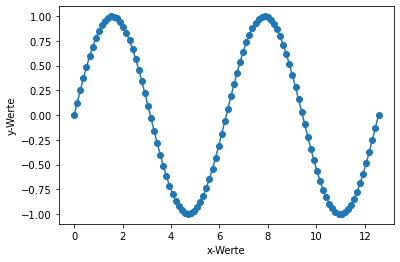

In [65]:
plt.plot(x2, y2, 'o-')
plt.xlabel('x-Werte')
plt.ylabel('y-Werte');